In [8]:
%%javascript
IPython.notebook.config.update({
  "load_extensions": {"calico-spell-check":true,
                      "calico-document-tools":true,
                      "calico-cell-tools":true
                     }
})

<IPython.core.display.Javascript object>

In [9]:
%%html
<style>
div.text_cell_render {
    font-size: 19pt;
}
</style>

<center>
    <h1> Geospatial data and analysis with Python </h1>
    <h3> <em> An overview of the NGCM Workshop with Chris Jochem </em> </h3>
    <h4> - Liam Tope </h4>
</center>

# Workshop Introduction

- <b style="color:#3352FF;">Who:</b>
    - Led by Chris Jochem of the WorldPop group 
        in the Geography Department of the University of
        Southampton 
    - Supported by two of his PhD Students: 
        Josie Baulch, and Chris Tomsett

- <b style="color:#3352FF;">When:</b> Took place over two full days on 22/09/2020 and 24/09/2020 

- <b style="color:#3352FF;">Where:</b> (Unsurprisingly) Microsoft Teams 

- <b style="color:#3352FF;">What:</b>
    - Online short lectures 
    - Hands-on practicals via Jupyter Notebooks 
    - Self-study, additional reading/watching material, and further challenges

## Workshop Topics

- <b style="color:#3352FF;"> Day 1:</b>
    - Spatial data formats & Introduction to ```GeoPandas```
    - Georefrencing and projections for global to regional coordinate systems
    - Calculations over reference geometries
    
- <b style="color:#3352FF;"> Day 2:</b>
    - Spatial operations
    - Mapping data and visualisations

## Presentation Overview
- An introduction to some of the course content concepts and 
    implementation is presented 
- <b style="color:#C70039">DISCLAIMER:</b> Includes some source code!

# Geographic Data

Two forms of geogrpahic data:
- <b style="color:#3352FF;"> Vector: </b>
    - Object or entities with shapes
    - Discrete representation (points, lines, or polygons)
    - Can contain multiple, non-spatial attributes
    - *e.g.* Polygon representation of small regions, or point representation of
        landmarks *etc.*
- <b style="color:#3352FF;"> Raster </b>
    - Gridded representation of continuous variable
    - One variable per layer
    - *e.g.* Images (pixels over a discrete grid)

It is more common when preforming spatial analysis and mapping, to consider
*vector* data.

# Vector Data in ```GeoPandas``` 

Here we will load some vector data in a compressed *shapefile* - a common file format in the GIS community

In [10]:
# import packages
import geopandas as gpd
import pandas as pd

# load example vector data - a set of US states from the US Census Bureau
filepath = '../data/cb_2018_us_state_500k.shp.zip'
gdf = gpd.read_file('zip://' + filepath)
 
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


 The data is loaded into a ```GeoDataFrame```, which is essentially a ```pandas.DataFrame``` with additional
 functionality:

* there is the additional __*geometry*__ column
* there are additional methods available for geographic data operations
* Other ```pandas.DataFrame``` methods and attributes can still be used

# Vector Data In ```GeoPandas``` 

Visualisation of the vector data can be implemented simply, since there is ```matplotlib``` functionality
within ```GeoPandas```


<AxesSubplot:>

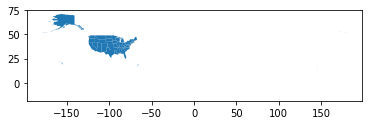

In [11]:
# Plot GeoDataFrame
gdf.plot()

Here, we can see that the vector data is given in terms of geodetic coordinates (latitude, longitude).
Additionally when we plot the data, we see it is given over a two-dimensional *projection* of an otherwise
ellipsoidal surface. The type of projection used heavily influences the accuracy of the subsequent mapping over 
various ranges.

# Projections & Coordinate Reference Systems

> **Map projections** try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).
>
> A **coordinate reference system** (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data.
>
>   -- <cite>QGIS Documentation</cite>


<div style="text-align: left">
<img style="float:left;" src="https://docs.qgis.org/3.10/en/_images/projection_families.png" width="500"
                               height="1000"/> 
</div>

* Map projections are never absolutely accurate

* As a result, all maps shows distortions of angular conformity, distance and area

* Many projections compromise the amount of distortions of these properties to some 
  acceptable limit


# Example Projections

We can load some sample data to show the effect of using different projections and coordinate reference systems

In [12]:
# read in a sample dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

'''
Project dataset to different coordinate systems
'''
# EPSG:3410 NSIDC EASE-Grid Global
world_nsidc = world.to_crs(epsg=3410)
# UTM zone centered on Southampton
world_utm = world.to_crs(32630)

# Example Projections

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

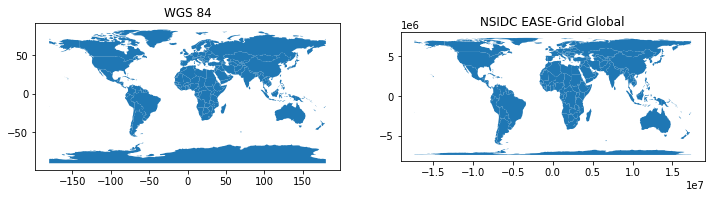

In [13]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
# plot the original data
world.plot(ax=ax1)
ax1.set_title("WGS 84")

# plot the reprojected data
world_nsidc.plot(ax=ax2)
ax2.set_title("NSIDC EASE-Grid Global")

# remove whitespace
plt.tight_layout

* The type of projection you use will affect calculations such as point-to-point distances, or polygon areas.
* When visualising overlapping datasets, it will also be important to ensure they are given in the same CRS

# Spatial Operations

* In the first day, key concepts of spatial data were introduced

* The next day started to introduce some more real-world spatial analysis concepts

* This included the use of real-world datasets - introducing the workflow of
    1. Loading the data
    2. Cleaning up the data - *i.e.* if there is missing data *etc.*
    3. Combining multiple datasets
    4. Producing clear and understandable maps of the data

* From here, we will explore this workflow procedure for the example of supermarket locations in Southampton
* We begin by loading the dataset of census "Output Areas" (OAs) - the smallest unit of population geography for     the census in the UK, as well as the supermarket location data

In [15]:
# load output areas
oa = gpd.read_file('../data/soton_OA_2011.gpkg')
# load supermarket points
smkt_pts = gpd.read_file('../data/supermarket_pts.gpkg')
# load supermarket polygons
smkt_ply = gpd.read_file('../data/supermarket_poly.gpkg')

Before cleaning and combining the supermarket data, we need to ensure they are in the same CRS as the 
'Output Areas' data for the regions of Southampton.

In [33]:
smkt_ply_proj = smkt_ply.to_crs(oa.crs)
smkt_pts_proj = smkt_pts.to_crs(oa.crs)

An initial visualisation of the supermarket point data gives

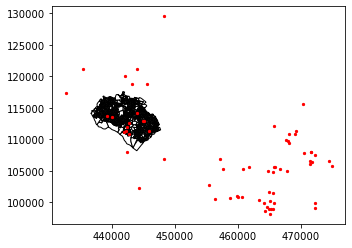

In [34]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

# plot the outlines of the output areas
oa.plot(ax=ax, color='white', edgecolor='black')

# add just the supermarket points
smkt_pts_proj.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

# Buffering and Clipping

* If we want to consider only supermarkets within the Southampton region then we can *clip* the supermarkets data
    to only those within the *OA* dataset. `GeoPandas` makes this operation very simple. 
* However, for some of the Southampton population, their nearest supermarket may be outside the *OA*-defined 
    region. To account for this, we can *buffer* the combined *OA* polygon with some given distance (in the units 
    of the CRS)

<AxesSubplot:>

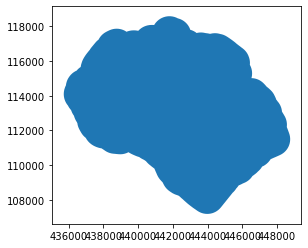

In [27]:
# buffer by 1km (note: units defined by the CRS)
oa_buffer = gpd.GeoDataFrame({'id':[1],
                              'geometry': oa.unary_union.buffer(1000)}, # unary_union combines all OA polygons 
                              crs=oa.crs)
oa_buffer.plot()

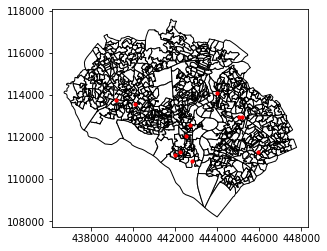

In [30]:
# clipping step
smkt_pts_soton = gpd.clip(smkt_pts_proj, oa_buffer)
smkt_ply_soton = gpd.clip(smkt_ply_proj, oa_buffer)

# repeat the plot to see the results of the clipping
fig, ax = plt.subplots()
ax.set_aspect('equal')

# plot the outlines of the output areas
oa.plot(ax=ax, color='white', edgecolor='black')

# add just the supermarket points
smkt_pts_soton.plot(ax=ax, marker='o', color='red', markersize=10)

plt.show()

# Combining Datasets

We can now look to combine the supermarket points and polygons data. It makes sense to have them all as points
since the supermarket polygons are much smaller than the *OA* polygons. We can do this be setting the geometry of our clipped data frame to the centre of the polygons:

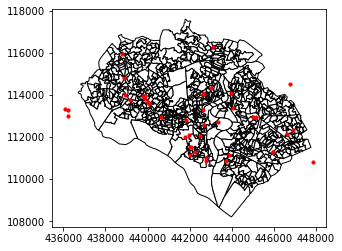

In [32]:
# create centroids of supermarkets
smkt_ply_soton.geometry = smkt_ply_soton.centroid
# combine supermarket data
smkts = smkt_pts_soton.append(smkt_ply_soton)

# recreate our basic data plot with the new dataset
fig, ax = plt.subplots()
ax.set_aspect('equal')

# plot the outlines of the output areas
oa.plot(ax=ax, color='white', edgecolor='black')
# add the supermarket points
smkts.plot(ax=ax, marker='o', color='red', markersize=10)

plt.show()